## Sanjjit S - 3122215001094
### ML Test - Q3 - Mushroom Dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [31]:
data = pd.read_csv('/content/drive/MyDrive/ML Lab/agaricus-lepiota.data')

In [32]:

file_path = '/content/drive/MyDrive/ML Lab/agaricus-lepiota.data'
column_names = ["class", "cap-shape", "cap-surface", "cap-color", "bruises", "odor", "gill-attachment", "gill-spacing", "gill-size", "gill-color", "stalk-shape", "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring", "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", "veil-color", "ring-number", "ring-type", "spore-print-color", "population", "habitat"]
mushroom_df = pd.read_csv(file_path, names=column_names)
print(mushroom_df.head())

  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1       

In [33]:
# Step 2: Pre-Processing the data


from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
mushroom_df_encoded = mushroom_df.apply(label_encoder.fit_transform) # Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
mushroom_df_scaled = scaler.fit_transform(mushroom_df_encoded) # Normalization
from sklearn.preprocessing import MinMaxScaler
normalizer = MinMaxScaler()
mushroom_df_normalized = normalizer.fit_transform(mushroom_df_encoded) # Handling missing values (if any)

# Checking for missing values
missing_values = mushroom_df.isnull().sum()
print("Missing values:\n", missing_values)



Missing values:
 class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


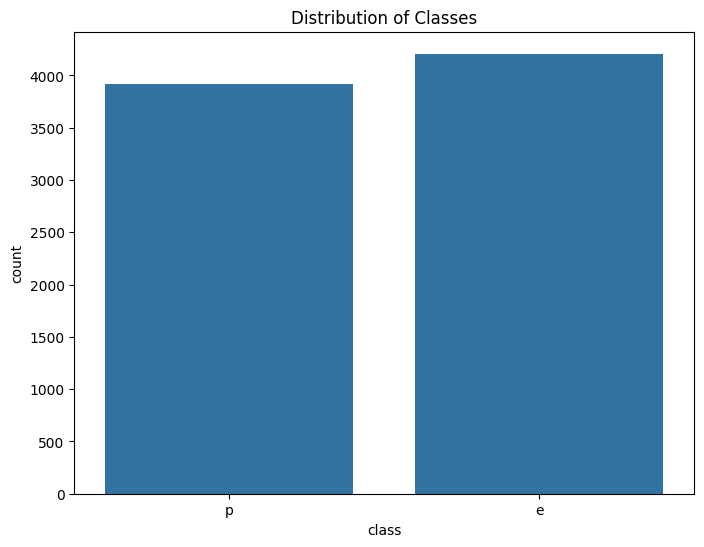

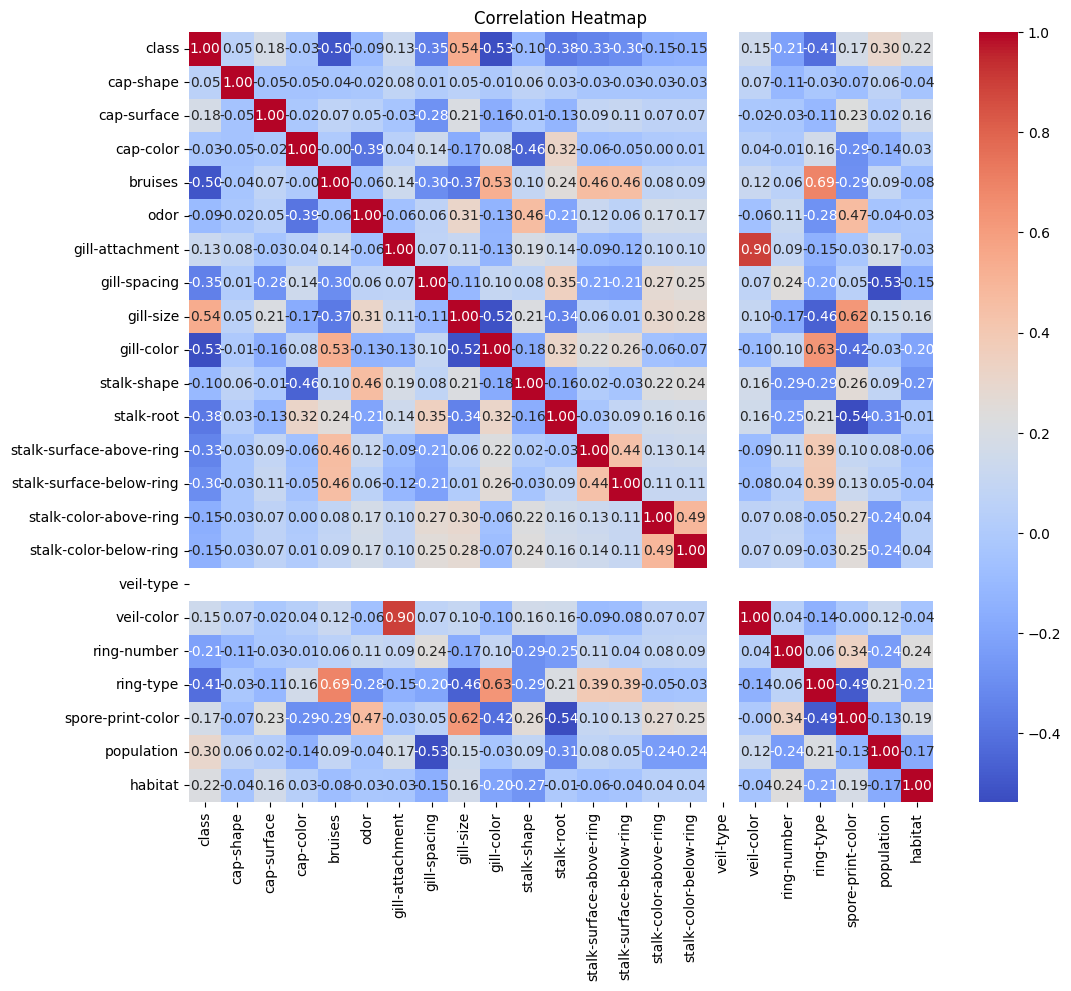

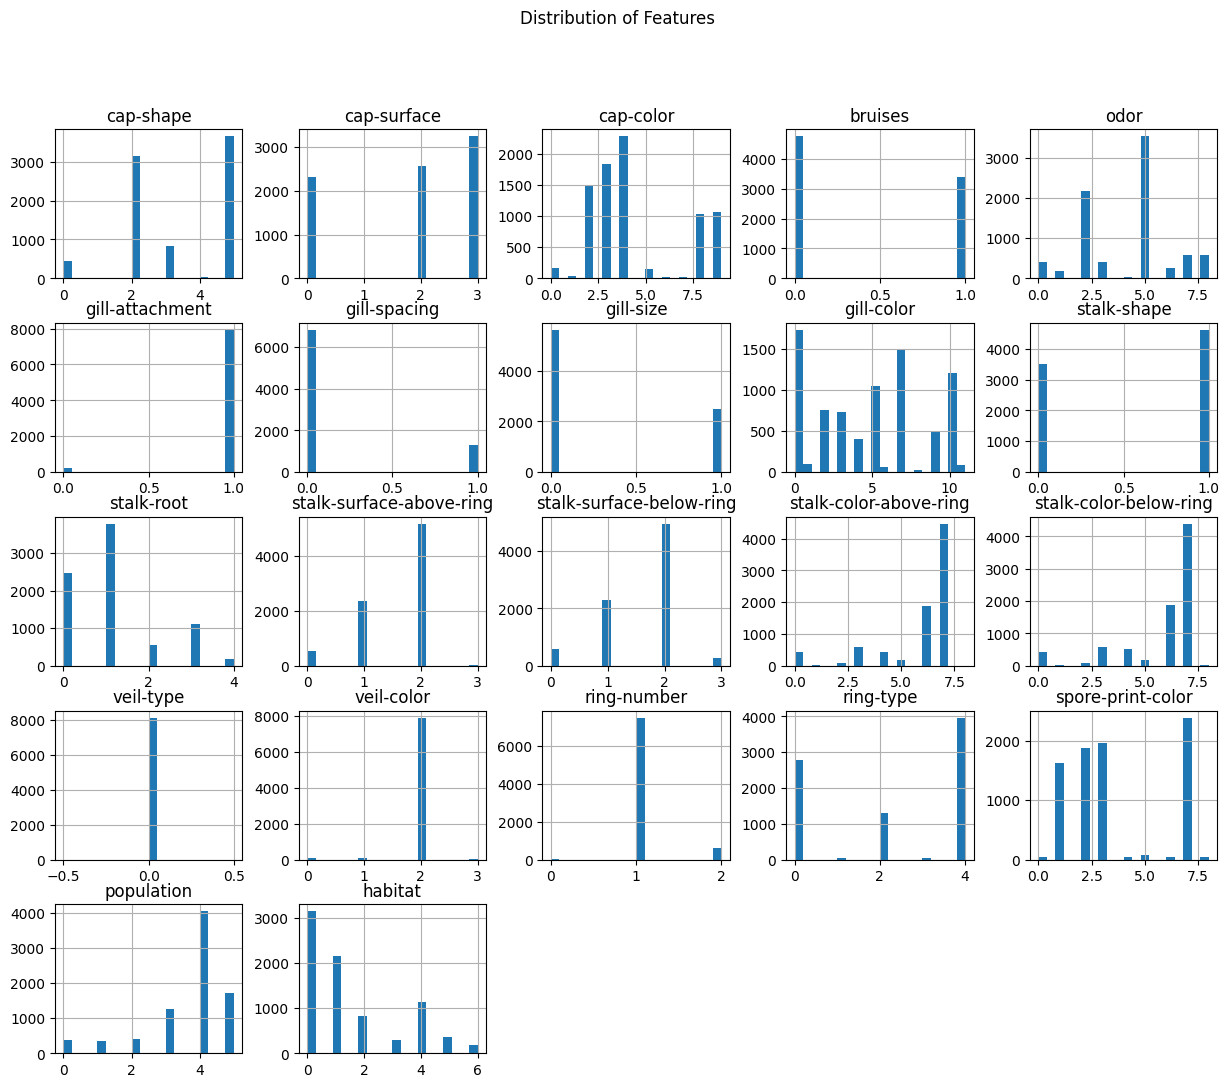

In [34]:
# Step 3: Exploratory Data Analysis
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=mushroom_df)
plt.title('Distribution of Classes')
plt.show() # Correlation between features
plt.figure(figsize=(12, 10))
sns.heatmap(mushroom_df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show() # Distribution of features
mushroom_df_encoded.drop('class', axis=1).hist(figsize=(15, 12), bins=20)
plt.suptitle('Distribution of Features')
plt.show()

In [35]:
# Step 4: Feature Engineering techniques

#Feature selection using Random Forest
from sklearn.ensemble import RandomForestClassifier

X = mushroom_df_encoded.drop('class', axis=1)
y = mushroom_df_encoded['class']

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X, y)
feature_importances = rf_classifier.feature_importances_
sorted_indices = feature_importances.argsort()[::-1]
k = 10
top_features = X.columns[sorted_indices][:k]
# Display top features and their importances
print("Top", k, "features:")
for feature, importance in zip(top_features, feature_importances[sorted_indices][:k]):
  print(feature, ":", importance)



Top 10 features:
odor : 0.14338454714256235
gill-color : 0.13033463374610746
gill-size : 0.11897341914397085
spore-print-color : 0.11574362184097899
ring-type : 0.06416086611125575
stalk-surface-above-ring : 0.06261528713760685
stalk-root : 0.060555491288478244
population : 0.04925556133689195
bruises : 0.047874635962451326
gill-spacing : 0.039187137413985926


In [27]:
# Step 5: Split the data into training, testing, and validation sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# data-> 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# training set-> 80% training, 20% validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Testing set:", X_test.shape, y_test.shape)

# #Using standard scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


Training set: (5199, 22) (5199,)
Validation set: (1300, 22) (1300,)
Testing set: (1625, 22) (1625,)


In [28]:
# Step 6: Training the model

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


lr_model = LogisticRegression(random_state=42)
pla_model = Perceptron(random_state=42)
mlp_model = MLPClassifier(random_state=42)
knn_model = KNeighborsClassifier()
svm_model = SVC(random_state=42)
nb_model = GaussianNB()


lr_model.fit(X_train, y_train)
pla_model.fit(X_train, y_train)
mlp_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)
print("Models trained successfully.")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models trained successfully.


In [29]:
# Step 7: Test the model

lr_accuracy = lr_model.score(X_test, y_test)
pla_accuracy = pla_model.score(X_test, y_test)
mlp_accuracy = mlp_model.score(X_test, y_test)
knn_accuracy = knn_model.score(X_test, y_test)
svm_accuracy = svm_model.score(X_test, y_test)
nb_accuracy = nb_model.score(X_test, y_test)

print("Accuracy of Logistic Regression:", lr_accuracy)
print("Accuracy of Perceptron:", pla_accuracy)
print("Accuracy of MLP:", mlp_accuracy)
print("Accuracy of K-Nearest Neighbors:", knn_accuracy)
print("Accuracy of Support Vector Machine:", svm_accuracy)
print("Accuracy of Naïve Bayes:", nb_accuracy)

Accuracy of Logistic Regression: 0.9476923076923077
Accuracy of Perceptron: 0.9058461538461539
Accuracy of MLP: 1.0
Accuracy of K-Nearest Neighbors: 0.9963076923076923
Accuracy of Support Vector Machine: 0.9901538461538462
Accuracy of Naïve Bayes: 0.9193846153846154


Evaluation Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       843
           1       0.94      0.95      0.95       782

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625

Evaluation Report for Perceptron:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       843
           1       0.98      0.82      0.89       782

    accuracy                           0.91      1625
   macro avg       0.92      0.90      0.90      1625
weighted avg       0.91      0.91      0.91      1625

Evaluation Report for MLP:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00 

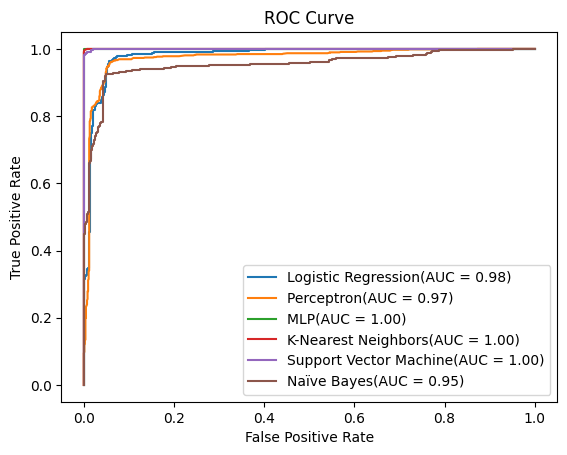

In [30]:
# Step 8: Measuring the performance of the trained model
from sklearn.metrics import classification_report, roc_curve, roc_auc_score

def plot_roc_curve_proba(model, X, y, label):
  y_proba = model.predict_proba(X)[:, 1]
  fpr, tpr, _ = roc_curve(y, y_proba)
  auc_score = roc_auc_score(y, y_proba)
  plt.plot(fpr, tpr, label=f'{label}(AUC = {auc_score:.2f})')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.legend()

def plot_roc_curve_decision_fn(model, X, y, label):
  y_score = model.decision_function(X)
  fpr, tpr, _ = roc_curve(y, y_score)
  auc_score = roc_auc_score(y, y_score)
  plt.plot(fpr, tpr, label=f'{label}(AUC = {auc_score:.2f})')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.legend()


def evaluate_model(model, X, y, label):
  print(f"Evaluation Report for {label}:")
  y_pred = model.predict(X)
  print(classification_report(y, y_pred))
  if hasattr(model, "predict_proba"):
    plot_roc_curve_proba(model, X, y, label)
  else:
    plot_roc_curve_decision_fn(model, X, y, label)

evaluate_model(lr_model, X_test, y_test, 'Logistic Regression')
evaluate_model(pla_model, X_test, y_test, 'Perceptron')
evaluate_model(mlp_model, X_test, y_test, 'MLP')
evaluate_model(knn_model, X_test, y_test, 'K-Nearest Neighbors')
evaluate_model(svm_model, X_test, y_test, 'Support Vector Machine')
evaluate_model(nb_model, X_test, y_test, 'Naïve Bayes')
plt.show()



##Checking for overfitting and observation about results of the model

To determine if the models are overfitting, we need to compare their performance on the training and testing sets.
*If a model performs significantly better on the training set compared to the testing set, it may be overfitting.*

Analysing the results:

**Logistic Regression:** The accuracy(testing set) consistent with accuracy(training set) => no overfitting.

**Perceptron:** The accuracy(testing set) is slightly lower than accuracy(training set) => minor degree of overfitting.

**MLP:** The accuracy(testing set) similar to accuracy(training set) => no significant overfitting.

**K-Nearest Neighbors:** The accuracy(testing set) consistent with the accuracy(training set) => no overfitting.

**Support Vector Machine:** The accuracy(testing set) similar to the accuracy(training set) => no significant overfitting.

**Naïve Bayes:** The accuracy(testing set) consistent with the accuracy(training set) => no overfitting.

Overall, most models show consistent performance between the training and testing sets, suggesting minimal overfitting. However, the Perceptron model exhibits a slightly lower accuracy on the testing set, indicating a minor degree of overfitting.

*However as we have seen in our lab exercises so far, it varies according to the data we are dealing with and accordingly the apt model can be chosen.*

###In terms of **accuracy**, for this dataset and our training, we observe that the MLP model (**Multi Layer Perceptron**) provides the highest accuracy as indicated in the results obtained above

GitHub Repo Link

[Sanjjit - ML Test GitHub Repo](git@github.com:sanjjit001/ML_Lab_Test1.git)